## Multi Objective Optimization example (NSGAII)



In [3]:
from mewpy.simulation import SimulationMethod, get_simulator
from mewpy.optimization.evaluation import BPCY,WYIELD
from mewpy.problems.reactions import RKOProblem, ROUProblem
from mewpy.optimization import EA
from collections import OrderedDict

%matplotlib notebook

from reframed.io.sbml import load_cbmodel
model = load_cbmodel('models/iMM904SL_v6.xml', flavor='cobra')

BIOMASS_ID = 'R_biomass_SC5_notrace'
PRODUCT_ID = 'R_EX_tyr_L_e_'
O2 = 'R_EX_o2_e_'
GLC = 'R_EX_glc_e_'
envcond = {GLC: (-10.0,999999.0), O2: (-12.25,100000.0)}

model.set_objective({BIOMASS_ID:1})

# compute reference flux values (optional)
simulation = get_simulator(model,envcond= envcond) 
res = simulation.simulate(method=SimulationMethod.pFBA)
reference = res.fluxes


# The evaluation (objective) functions
evaluator_1 = WYIELD(BIOMASS_ID, PRODUCT_ID, parsimonious = True)
evaluator_2 = BPCY(BIOMASS_ID, PRODUCT_ID, uptake = GLC, method=SimulationMethod.lMOMA ,reference=reference)

# The KO optimization problem
problem = ROUProblem( model, 
                      fevaluation=[evaluator_1,evaluator_2], 
                      envcond = envcond,  
                      candidate_max_size = 10)

# A new instance of the EA optimizer for the problem
# The stopping criteria is set to 10 generations (1100 evaluations)
# Usually the stopping criteria should be set around 500 generations
ea = EA(problem, max_generations = 10,visualizer = True,mp=True)



2020-03-05 11:06:45,107	WARNING services.py:586 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-03-05 11:06:45,108	INFO resource_spec.py:212 -- Starting Ray with 13.43 GiB memory available for workers and up to 6.73 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-05 11:06:45,434	INFO services.py:1078 -- View the Ray dashboard at localhost:8265


Creating 6 workers.


<IPython.core.display.Javascript object>


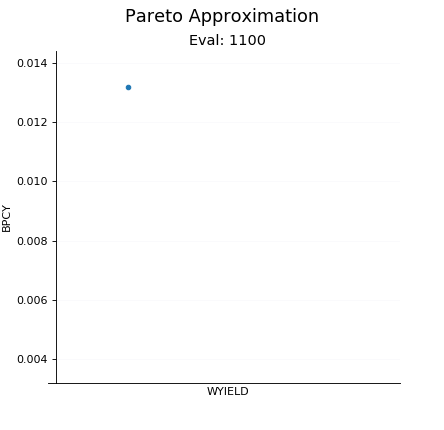

Gen    Eval|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
   0    100|  0.000000  0.009479  0.009087  0.008234  0.002472|  0.000000  0.000959  0.000000  0.000035  0.000162|
   1    200|  0.004425  0.009479  0.009087  0.008965  0.000665|  0.000000  0.000959  0.000000  0.000057  0.000192|
   2    300|  0.004425  0.009622  0.009088  0.008907  0.000907|  0.000000  0.000959  0.000020  0.000106  0.000255|
   3    400|  0.004425  0.009765  0.009192  0.008842  0.001074|  0.000000  0.000959  0.000038  0.000167  0.000299|
   4    500|  0.004317  0.278054  0.009347  0.011234  0.026852|  0.000000  0.000959  0.000090  0.000318  0.000386|
   5    600|  0.004317  0.374868  0.007358  0.014220  0.045153|  0.000000  0.003291  0.000895  0.000597  0.000495|
   6    700|  0.004317  0.374868  0.007333  0.021345  0.067634|  0.000000  0.003291  0.000897  0.000742  0.000525|
   7    800|  0.004317  0.385684  0.007348  0.040959  0.100099|  0.000000  0.004

In [4]:
# runs the optimization
final_pop = ea.run()

In [10]:
# Save the obtained solutions to csv
import mewpy.utils.utilities as util
util.population_to_csv(problem,final_pop,'results.csv')